In [1]:
#### Necessary libraries ####
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import xarray as xr
import matplotlib.pyplot as plt # Matplotlib is a scientific plotting package.
import cartopy.crs as ccrs
import cartopy
from cmocean import cm

from Functions import *

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [2]:
# Load results and masks
pak = xr.open_dataset('./merged_Pakistan_v150724.nc')
aus = xr.open_dataset('./merged_Australia_v150724.nc')
sct = xr.open_dataset('./merged_Scotland_v150724.nc')

mask_pak = xr.open_dataset('./Pakistan/Mask_PakistanFlood_box_lon-180to180.nc')
mask_aus = xr.open_dataset('./Australia/mask_australia_box_lon-180to180.nc')
mask_sct = xr.open_dataset('./Scotland/mask_scotland_box_lon-180to180.nc')

In [3]:
# Select one ensemble member per method
drop_list = ["UTrack Ens1", "UTrack Ens3", "UTrack Ens4", "UTrack Ens5", 
             "FLEXPART-HAMSTER Ens1", "FLEXPART-HAMSTER Ens2", 
             "FLEXPART-HAMSTER Ens3", "FLEXPART-HAMSTER Ens4",
            ]
drop_list_TFC = ["FLEXPART-WaterSip (TFC) Ens2", "FLEXPART-WaterSip (TFC) Ens3"]  # Need to confirm this

pak = pak.drop_vars(drop_list)
aus = aus.drop_vars(drop_list).drop_vars(drop_list_TFC)
sct = sct.drop_vars(drop_list).drop_vars(drop_list_TFC)

## Absolute values of moisture sources [mm]

In [4]:
# Mean
pakm = pak.to_array(dim='mean').mean('mean')
ausm = aus.to_array(dim='mean').mean('mean')
sctm = sct.to_array(dim='mean').mean('mean')

# Standard variation
paks = pak.to_array(dim='std').std('std')
auss = aus.to_array(dim='std').std('std')
scts = sct.to_array(dim='std').std('std')

# Normalized Standard variation
pakn = paks/pakm
ausn = auss/ausm
sctn = scts/sctm

### Robinson projection

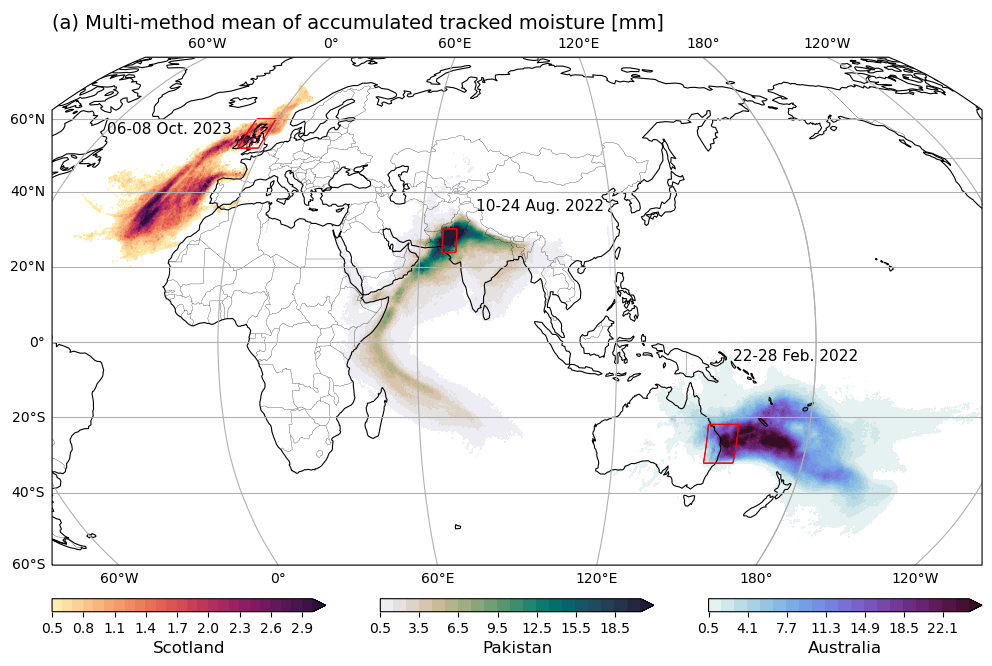

In [8]:
# MEAN
prj = ccrs.PlateCarree()
prjr = ccrs.Robinson(central_longitude=90, globe=None)
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjr})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.05, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

p1 = pakm.plot.contourf(ax=ax, levels=np.linspace(0.5,20.5,21), extend='max',
                        cmap = cm.rain,
                        transform=prj,
                        add_colorbar=False,
                       )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = ausm.plot.contourf(ax=ax, levels=np.linspace(0.5,24.5,21), extend='max',
                        cmap = cm.dense,
                        transform=prj,
                        add_colorbar=False,
                       )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = sctm.plot.contourf(ax=ax, levels=np.linspace(0.5,3.,26), extend='max',
                        cmap = cm.matter,
                        transform=prj,
                        add_colorbar=False, 
                       )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

# Pakistan
ax.text(77,35, '10-24 Aug. 2022',fontsize=11, transform=prj)
# Australia
ax.text(155, -5, '22-28 Feb. 2022',fontsize=11, transform=prj)
# Scotland
ax.text(-59,56, '06-08 Oct. 2023',fontsize=11, transform=prj)

ax.set_title("(a) Multi-method mean of accumulated tracked moisture [mm]", fontsize=14, loc="left")
ax.set_extent([-50,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland', size=12)

# fig.savefig('Figure3a.pdf', format='pdf')

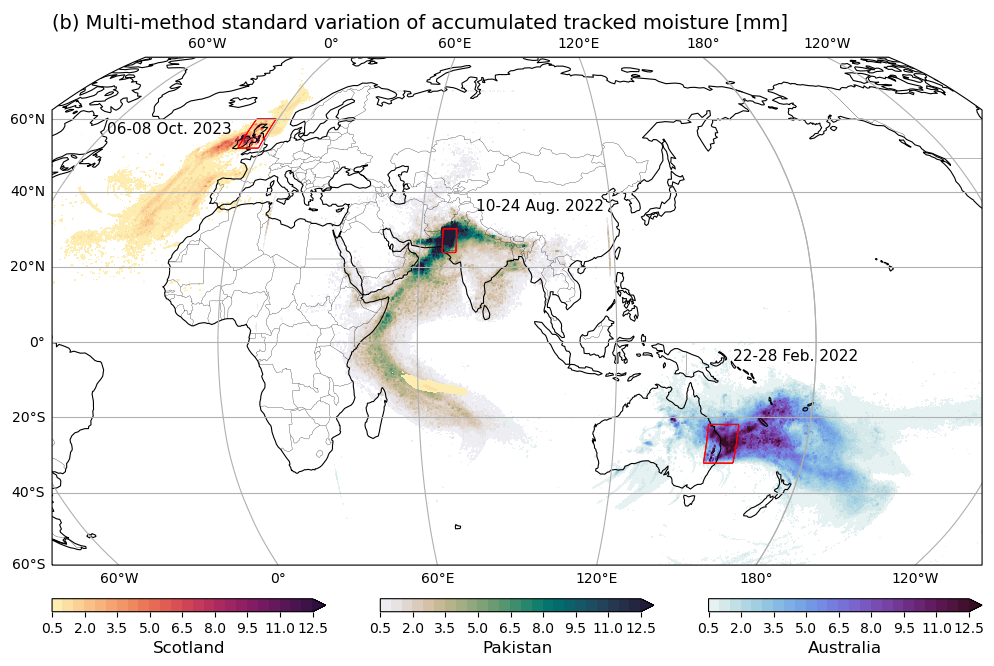

In [25]:
# STANDARD DEVIATION

prjr = ccrs.Robinson(central_longitude=90, globe=None)
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjr})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.05, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

p1 = paks.plot.contourf(ax=ax, levels=np.linspace(0.5,12.5,25), extend='max',
                        cmap = cm.rain,
                        transform=prj,
                        add_colorbar=False,
                       )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = auss.plot.contourf(ax=ax, levels=np.linspace(0.5,12.5,25), extend='max',
                        cmap = cm.dense,
                        transform=prj,
                        add_colorbar=False,
                       )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = scts.plot.contourf(ax=ax, levels=np.linspace(0.5,12.5,25), extend='max',
                        cmap = cm.matter,
                        transform=prj,
                        add_colorbar=False, 
                       )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

# Pakistan
ax.text(77,35, '10-24 Aug. 2022',fontsize=11, transform=prj)
# Australia
ax.text(155, -5, '22-28 Feb. 2022',fontsize=11, transform=prj)
# Scotland
ax.text(-59,56, '06-08 Oct. 2023',fontsize=11, transform=prj)

ax.set_title("(b) Multi-method standard variation of accumulated tracked moisture [mm]", fontsize=14, loc="left")
ax.set_extent([-50,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland', size=12)

# fig.savefig('Figure3b.pdf', format='pdf')

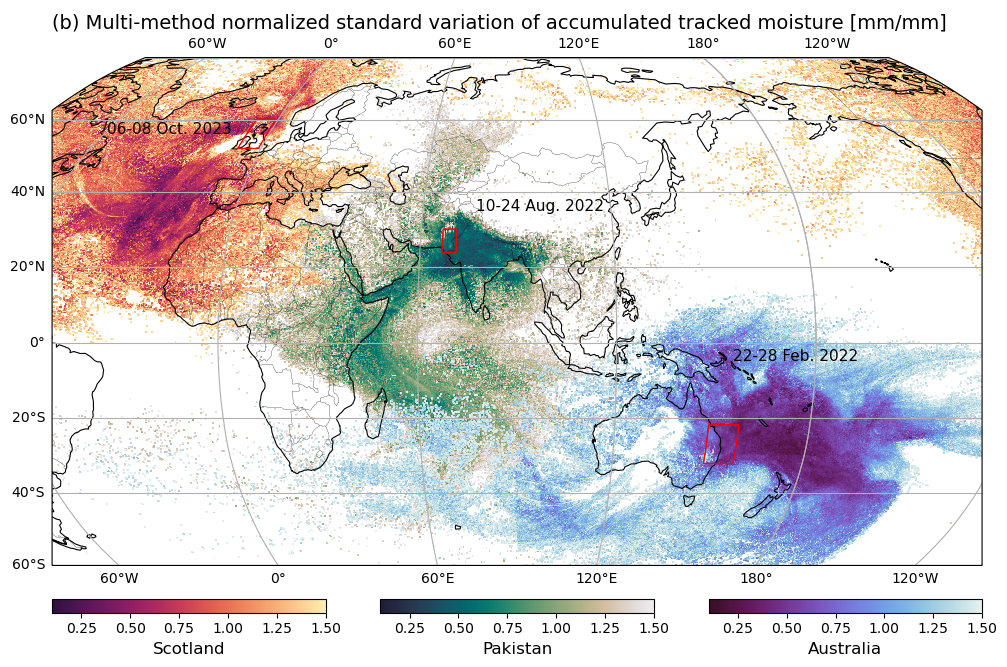

In [69]:
# Normalized Standard Deviation - without threshold
prjr = ccrs.Robinson(central_longitude=90, globe=None)
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjr})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.05, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

vmax = 1.5
p1 = pakn.where(pakn<vmax).plot(ax=ax, vmin= 0.1, vmax=vmax,
                                cmap = cm.rain_r,
                                transform=prj,
                                add_colorbar=False,
                               )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = ausn.where(ausn<vmax).plot(ax=ax, vmin= 0.1, vmax=vmax,
                                cmap = cm.dense_r,
                                transform=prj,
                                add_colorbar=False,
                               )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = sctn.where(sctn<vmax).plot(ax=ax, vmin= 0.1, vmax=vmax,
                                cmap = cm.matter_r,
                                transform=prj,
                                add_colorbar=False, 
                               )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

# Pakistan
ax.text(77,35, '10-24 Aug. 2022',fontsize=11, transform=prj)
# Australia
ax.text(155, -5, '22-28 Feb. 2022',fontsize=11, transform=prj)
# Scotland
ax.text(-59,56, '06-08 Oct. 2023',fontsize=11, transform=prj)

ax.set_title("(b) Multi-method normalized standard variation of accumulated tracked moisture [mm/mm]", fontsize=14, loc="left")
ax.set_extent([-50,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland', size=12)

# fig.savefig('Figure3b_n.pdf', format='pdf')

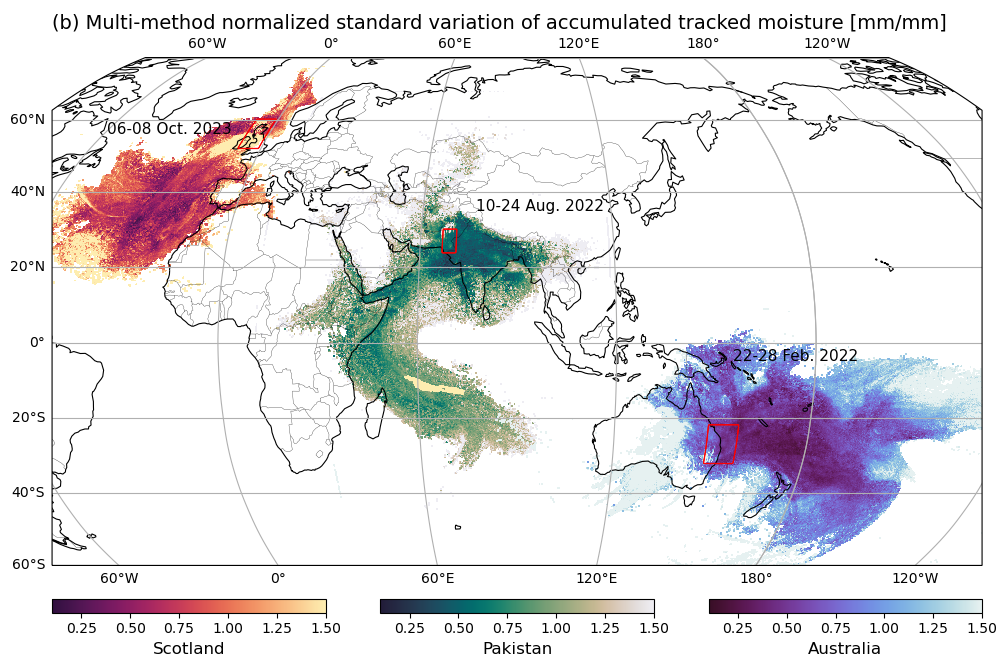

In [10]:
# Normalized Standard Deviation - with threshold
prjr = ccrs.Robinson(central_longitude=90, globe=None)
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjr})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.05, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

vmax = 1.5
mths = 0.2  # filter out normalized values by minimum mean values
p1 = pakn.where(pakm>mths).plot(ax=ax, vmin= 0.1, vmax=vmax,
                                cmap = cm.rain_r,
                                transform=prj,
                                add_colorbar=False,
                               )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = ausn.where(ausm>mths).plot(ax=ax, vmin= 0.1, vmax=vmax,
                                cmap = cm.dense_r,
                                transform=prj,
                                add_colorbar=False,
                               )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = sctn.where(sctm>mths).plot(ax=ax, vmin= 0.1, vmax=vmax,
                                cmap = cm.matter_r,
                                transform=prj,
                                add_colorbar=False, 
                               )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

# Pakistan
ax.text(77,35, '10-24 Aug. 2022',fontsize=11, transform=prj)
# Australia
ax.text(155, -5, '22-28 Feb. 2022',fontsize=11, transform=prj)
# Scotland
ax.text(-59,56, '06-08 Oct. 2023',fontsize=11, transform=prj)

ax.set_title("(b) Multi-method normalized standard variation of accumulated tracked moisture [mm/mm]", fontsize=14, loc="left")
ax.set_extent([-50,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland', size=12)

# fig.savefig('Figure3b_n_ths.pdf', format='pdf')